In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
sess = tf.InteractiveSession()

In [3]:
num_observations = 1000
learning_rate = 0.05
observations = num_observations

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

input_size = 2
output_size = 1

inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])
weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))
outputs = tf.matmul(inputs, weights) + biases

mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.
optimize = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(mean_loss)

initializer = tf.global_variables_initializer()
sess.run(initializer)

for i in range(100):
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: generated_inputs, targets: generated_targets})

    print(curr_loss)

226.85689
115.76354
61.69412
34.865524
21.228933
14.074271
10.155863
7.88367
6.468622
5.51388
4.8169236
4.272611
3.825146
3.444026
3.1118848
2.8182826
2.5565064
2.3219075
2.1110277
1.921131
1.7499504
1.5955466
1.4562252
1.3304856
1.2169905
1.1145403
1.0220554
0.93856496
0.86319214
0.7951481
0.7337198
0.67826366
0.6281988
0.583001
0.54219764
0.50536096
0.4721054
0.442083
0.4149793
0.39051062
0.36842048
0.3484782
0.33047456
0.31422082
0.29954773
0.28630084
0.2743418
0.26354548
0.25379863
0.24499945
0.23705573
0.22988419
0.22340998
0.21756506
0.21228833
0.20752469
0.20322424
0.19934186
0.19583675
0.19267249
0.18981585
0.18723688
0.18490866
0.18280682
0.1809092
0.1791961
0.17764963
0.1762534
0.17499298
0.17385504
0.1728278
0.1719004
0.17106313
0.17030725
0.16962491
0.16900882
0.16845272
0.16795069
0.16749741
0.16708817
0.16671881
0.16638531
0.16608422
0.1658124
0.16556698
0.1653455
0.16514547
0.1649649
0.16480194
0.16465479
0.16452192
0.16440204
0.16429377
0.16419601
0.16410774
0.16402808


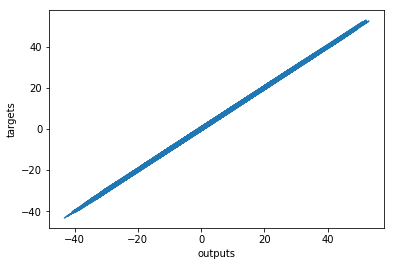

In [9]:
out = sess.run([outputs], 
               feed_dict={inputs: generated_inputs})

plt.plot(np.squeeze(out), np.squeeze(generated_targets))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()